# PCA-report (round 2 - 19 September)

**4 PCAs:** <br> 

* PCA 1 (17Sep) : 14 elements, standardized and inverse normalized - *done*
    * Cal, Dol, ORP, PH, Fe, Mn, Mg, S, Ca, Cd, Zr
    * See: http://nbviewer.ipython.org/urls/bitbucket.org/KerBrau/pcarticle/raw/master/KB-PCA1-17Sep-14-elmts.ipynb
* PCA 2 (19Sep): 13 elements, no normalization - *done*
    * Removed Cd - *ok*
    * Replot without normalisation - *ok*
    * Plot unoxidized clay samples with a different symbol - *ok*
* PCA 3: 13 elements, remove unoxidised clay samples
    * plot - *ok*
    * draw discontinuous lines
* PCA 4: Merge mottled and unmottled clay samples
    * Plot difference between B and C horizon 
    * PCA 3A incl. oxidized samples 
        * Plot unoxidized clay samples with a different symbol
    * PCA 3B excl. oxidized samples

** Qs:**
* **Use standardized or invnorm data?**
    * **Impact of bimodal distributions?**
    
**Also:** <br>

* Linear PCA equations for Stew
* Line plots for all
* Chi test for each

**Data:** <br>

The BE dataset merges C-horizon data (unoxidized clay) for BE-SWNE and BE-SENW. It has 60 variables (elements), and 73 rows (sampling stations). We extract a subset of data limited to the elements to be considered in the PCA.

* Aim at having at least 5 time less variables than samples (=approx 14)
* Remove all elements with high correlation values (>90%)
* Select elements for which variability can be explained, ie. which are representative of reactions likely occuring at the ring edge

**Reactions & proxies: **

$CaCO_3+HCO_3^{-}=2CO_3^{2-}+Ca^{2+}+H^{+}$

In [53]:
%reload_ext rpy2.ipython

In [54]:
%%R
library(data.table)
d=data.frame(fread("BE_data_for_PCA_CaMS.csv"))
print (dim (d))
names(d)

[1] 73 60
 [1] "V1"       "Dist"     "Line"     "Location" "Ca_MS"    "Cal"     
 [7] "Dol"      "CalDol"   "ORP3"     "pH1"      "Al_ES"    "Fe_ES"   
[13] "Mg_ES"    "Mn_ES"    "Na_ES"    "P_ES"     "S_ES"     "K_ES"    
[19] "Ti_ES"    "V_ES"     "Ag_MS"    "Ba_MS"    "Be_MS"    "Cd_MS"   
[25] "Ce_MS"    "Co_MS"    "Cr_MS"    "Cs_MS"    "Cu_MS"    "Dy_MS"   
[31] "Er_MS"    "Eu_MS"    "Ga_MS"    "Gd_MS"    "Hf_MS"    "Ho_MS"   
[37] "La_MS"    "Li_MS"    "Lu_MS"    "Mo_MS"    "Nb_MS"    "Nd_MS"   
[43] "Pb_MS"    "Pr_MS"    "Rb_MS"    "Sb_MS"    "Sm_MS"    "Sn_MS"   
[49] "Tb_MS"    "Th_MS"    "Tl_MS"    "Tm_MS"    "U._MS"    "W._MS"   
[55] "Y._MS"    "Yb_MS"    "Zn_MS"    "Zr_MS"    "LREE"     "HREE"    


In [55]:
%%R

#Subsetting by indexing
va=c("V1","Line", "Dist", "Location", "Zr_MS", "Mn_ES", "Fe_ES", "pH1", "Ca_MS", "Cal", "Dol", "ORP3", "S_ES", "Mg_ES")
cnums=cbind(1:ncol(d), colnames(d))
subset=d[,as.numeric(cnums[cnums[,2] %in% va,1])]
print(length(va))
print (ncol(subset))
colnames(subset)

[1] 14
[1] 14
 [1] "V1"       "Dist"     "Line"     "Location" "Ca_MS"    "Cal"     
 [7] "Dol"      "ORP3"     "pH1"      "Fe_ES"    "Mg_ES"    "Mn_ES"   
[13] "S_ES"     "Zr_MS"   


#  PCA 2 (19Sep): 13 elements, no normalization
---------------------------------------------------------------------

## Correlation plot
Black boxes represent element clusters.
* Cluster calculated using kmeans (?)
* **Why is ORP in the same cluster with Cd, Zr, Mn, Fe, despite low correlation?**

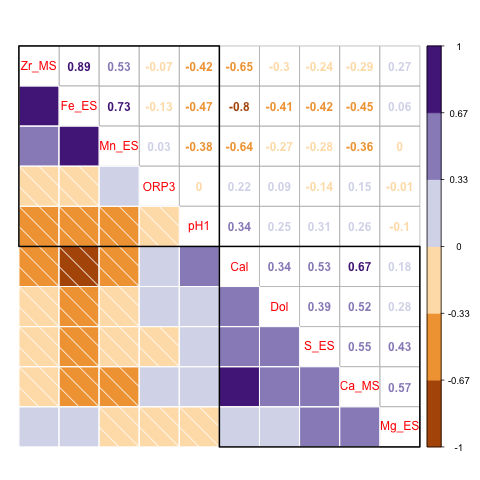

In [56]:
%%R
library("corrplot")
library("RColorBrewer")
corrplot.mixed(cor(subset[,5:14]), lower="shade", upper="number",order="AOE", col=brewer.pal(n=6, name="PuOr"))
corrRect.hclust(corr=cor(subset[,5:14]), k=2)

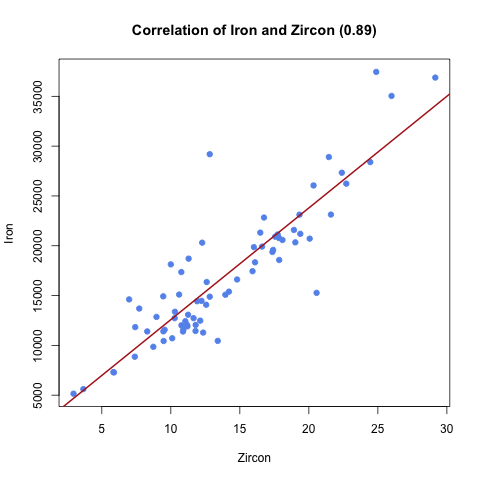

In [57]:
%%R
plot(x=subset$Zr_MS,y=subset$Fe_ES, pch=19, col="cornflowerblue",main="Correlation of Iron and Zircon (0.89)",xlab="Zircon",ylab="Iron")
abline(lm(subset$Fe_ES~subset$Zr_MS),lwd=2,col="firebrick")

# Standardizing (this time without normalizing)

In [58]:
%%R
# definir fonction standardisation et normalisation
stdnorm=function(x) {return((x-mean(x))/sd(x))}
## invnorm=function(x) {return(qnorm((rank(x, ties.method="random")-3/8)/(length(x)-0.75+1)))}

# normaliser les colonnes voulues de subset
## allnorm=data.frame(apply(as.matrix(subset[,4:13]), 2, invnorm))
## ncol(allnorm)

allnorm=data.frame(apply(as.matrix(subset[,5:14]), 2, stdnorm))
print (ncol(allnorm))
head (allnorm)

[1] 10
        Ca_MS         Cal        Dol        ORP3         pH1      Fe_ES
1 -0.16719084  0.99601626 -3.2219968  0.47301460  1.23700034 -1.1914100
2  1.38685322  0.89013868  0.7341925 -1.12402966  0.98654364 -0.8130269
3  0.06023024 -0.07352678 -0.3275100  0.51676924 -1.13095392  0.4269280
4  0.59087943  0.88475507  0.2302940  0.04640689 -0.37958382 -0.7913632
5 -1.83494545 -1.70117030 -1.2181213  0.62615583  0.05302321  2.9104971
6  1.15943214  1.30108726  1.3318396  1.05276354  0.30347991 -1.0456191
       Mg_ES      Mn_ES       S_ES      Zr_MS
1 -1.3747545 -0.9858038 -0.5358403 -1.2097421
2  1.0792188 -0.5492041  0.5740181 -0.3969719
3 -0.2493761  0.3340321 -0.4125227  0.4933809
4  0.9169420 -0.5742960  0.2928539 -0.5595260
5 -0.5598508  2.1908355 -1.3152075  2.8116231
6 -0.3568196 -0.8954728  0.8157205 -0.9622167


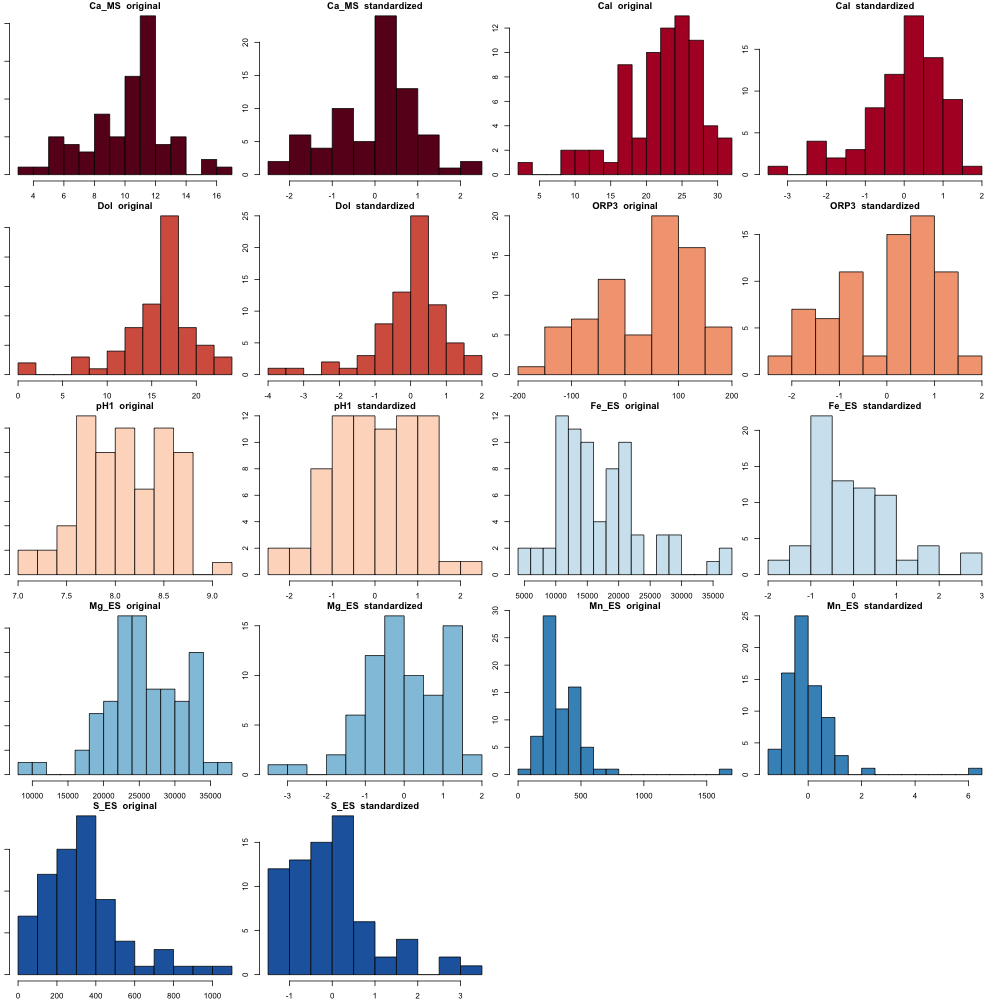

In [59]:
%%R -w 1000 -h 1000

#place side by side
par(mfrow=c(5,4),mar=c(2,1,1,1))

#alternative: color=c("yellow","blue","orange","red","green","pink","purple","salmon","beige","turquoise")
color=brewer.pal(n=10, name="RdBu")
for (n in 1:9)
    
{
hist(subset[,n+4],breaks=12,main=paste(colnames(subset)[n+4]," original"),col=color[n])
hist(allnorm[,n],breaks=12,main=paste(colnames(subset)[n+4]," standardized"),col=color[n])
}



## Running PCA 

In [60]:
%%R -h 500 -w 500
pca=prcomp(allnorm)

#Biplot
biplot(pca,pch=19)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.0795 1.3590 1.0591 0.87365 0.80475 0.71920 0.60321
Proportion of Variance 0.4324 0.1847 0.1122 0.07633 0.06476 0.05172 0.03639
Cumulative Proportion  0.4324 0.6171 0.7293 0.80561 0.87037 0.92210 0.95848
                           PC8     PC9    PC10
Standard deviation     0.49944 0.34816 0.21101
Proportion of Variance 0.02494 0.01212 0.00445
Cumulative Proportion  0.98343 0.99555 1.00000


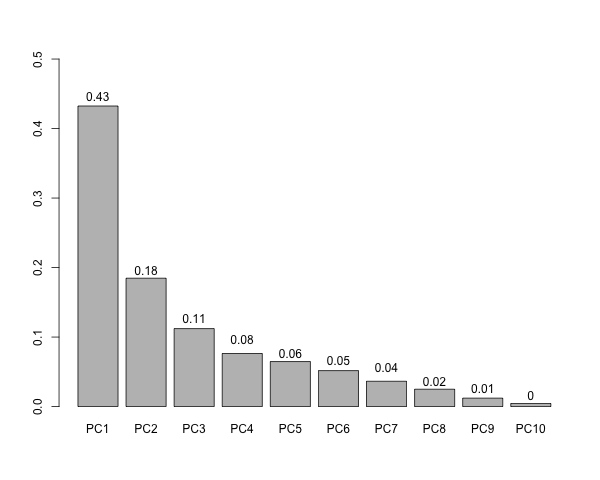

In [61]:
%%R -w 600
#display values
print (summary (pca))
#barplot with labels
bp = barplot(summary(pca)$importance[2,],ylim=c(0,0.5))
vals = round(summary(pca)$importance[2,],2)
text (bp,vals, labels = vals, pos = 3)

In [62]:
%%R
print (pca)

Standard deviations:
 [1] 2.0794874 1.3589867 1.0591032 0.8736550 0.8047511 0.7192002 0.6032069
 [8] 0.4994404 0.3481636 0.2110073

Rotation:
              PC1          PC2          PC3         PC4         PC5         PC6
Ca_MS  0.34854688 -0.382816475  0.136388676 -0.03385623  0.07595627 -0.08680861
Cal    0.42660833  0.007012951  0.144255874 -0.31062173  0.15431891  0.12654395
Dol    0.28031481 -0.220721020  0.072830558  0.53624180 -0.70675914 -0.10830974
ORP3   0.06017733  0.043107493  0.892562455  0.14859164  0.22837844  0.03673681
pH1    0.26456581  0.179407889 -0.225642750  0.67106411  0.56210312 -0.21437729
Fe_ES -0.43397778 -0.243587477 -0.023290404  0.12125009  0.11042508 -0.07923419
Mg_ES  0.10098740 -0.653207315  0.017754198 -0.14956443  0.10423278 -0.22151566
Mn_ES -0.35168246 -0.187993050  0.129972594  0.31938546  0.01699745  0.67097230
S_ES   0.30450762 -0.326596871 -0.299884902  0.02209909  0.19584681  0.55442272
Zr_MS -0.35970408 -0.377647443 -0.004495626  0.05328767  0

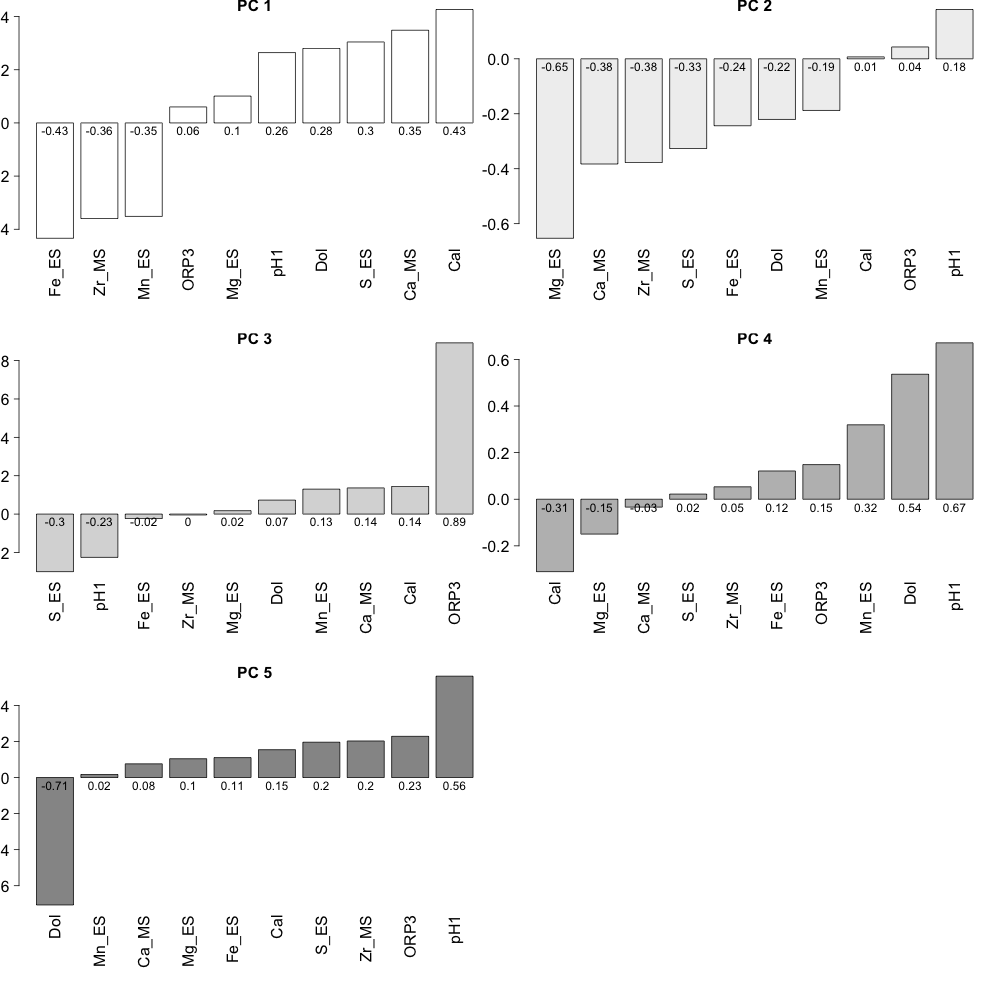

In [63]:
%%R -w 1000 -h 1000

#export
##pdf("BE_ScoreWeights_PCA2_20Sep.pdf", width=15, height=20)

#place side by side
par(mfrow=c(3,2),mar=c(10,2,1,1))

color=brewer.pal(n=8, name="Greys")
for (n in 1:5)
{    
#composantes de PC1(changer index pour PCN)
bp=barplot(sort(pca$rotation[,n]),main=paste("PC",n),col=color[n],cex.main=2,cex.axis=2,cex=2,las=2)
#add labels
vals=round(sort(pca$rotation[,n]),2)
text(bp,0,vals,labels=vals,pos=1,cex=1.5)
}

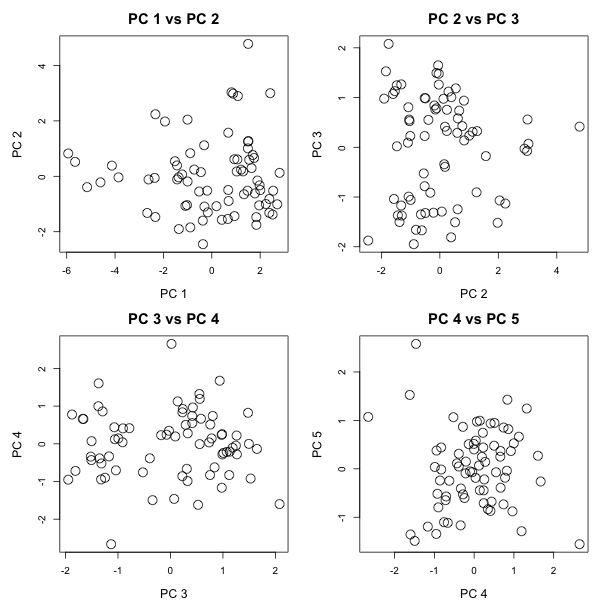

In [64]:
%%R -w 600 -h 600

# Place side by side
par(mfrow=c(2,2),mar=c(4,5,3,1))

# Plot PCs wrt each other 
for (n in 1:4)
{    
plot(pca$x[,n], pca$x[,n+1],main=paste("PC",n,"vs PC",n+1),xlab=paste("PC",n), ylab=paste("PC",n+1),cex.lab=1.25,cex.main=1.5,cex.axis=1,cex=2)
}

## Subsetting unoxidized C-horizon samples

The C-horizon dataset consists of oxidized and unoxidized samples, as outlined in figure 8 of the paper. Unoxidized samples will be labelled differently. Information drawn from column V and W of sheet "00-B (&meta)" in excel "BE-99-00_plots" in "1_data-THESIS_EDITED". <br>

14 out of 38 samples along the SE-NW line are unoxidized:
    * BE-59, -400m
    * BE-70 to BE-80, -205 to -50m
    * BE-54, 175m
    * BE-53, 200m

In [65]:
%%R

#Subset with subset function
unox=subset(subset,V1=="BE-70"|V1=="BE-71"|V1=="BE-72"|V1=="BE-73"|V1=="BE-74"|V1=="BE-75"|V1=="BE-76"|V1=="BE-77"|V1=="BE-78"|V1=="BE-79"|V1=="BE-80"|V1=="BE-38"|V1=="BE-39")
print(unox)

      V1 Dist  Line Location Ca_MS   Cal   Dol   ORP3  pH1 Fe_ES Mg_ES Mn_ES
9  BE-70 -205 SE-NW NEAREDGE  10.5 25.15 16.38  -42.0 8.12 14433 27474   273
10 BE-71 -200 SE-NW     EDGE   6.1 21.24 16.72   69.0 8.35  7317 17320   110
11 BE-72 -195 SE-NW     EDGE   8.4 23.59 14.69   58.0 8.54 10449 21202   174
12 BE-73 -190 SE-NW     EDGE   6.8 23.20 17.84   49.0 8.45  7281 18544   116
13 BE-74 -185 SE-NW NEAREDGE  11.8 28.42 17.15   29.0 8.74 11388 28971   241
14 BE-75 -180 SE-NW       IN  12.0 24.61 18.07  -59.0 8.61 14467 25742   306
15 BE-76 -175 SE-NW       IN  11.3 21.59 21.06  -28.0 8.73 19377 28524   369
16 BE-77 -170 SE-NW       IN  10.4 19.28 17.12  -42.0 8.53 20342 29344   418
17 BE-78 -150 SE-NW       IN   7.8 16.27 13.07  -15.0 8.45 20910 23313   473
18 BE-79 -100 SE-NW       IN  10.9 25.53 19.60  -32.0 8.58 12428 27543   257
19 BE-80  -50 SE-NW       IN  11.9 27.31 16.45  -25.0 8.60 12047 32600   273
38 BE-39  399 SE-NW      OUT  11.4 17.14 18.98 -113.0 8.25 20712 34120   478

## PC Score transects

PC score transects differ primarily for PC3-5. <br>

In [66]:
%%R -w 1000 -h 1500

#export
##pdf("BE_ScoreTransect_PCA2_20Sep.pdf", width=15, height=20)

### FUNCTION FOR TRANSPARENT COLORS
makeTransparent = function(coul, alpha=0.2) {
  alpha = floor(255*alpha)  
  col = col2rgb(coul, alpha=FALSE)
    return(rgb(red=col[1], green=col[2], blue=col[3], alpha=alpha, maxColorValue=255))
    }

#Plot PCs over distance
par(mfrow=c(5,2), mar=c(2,5,3,1))
for (pcindex in 1:5){
    
first=pca$x[d$Line=="SE-NW",]
second=pca$x[d$Line=="SW-NE",]

a=cbind(subset$Dist[d$Line=="SE-NW"], first[,pcindex])
plot(a[order(a[,1]),1], a[order(a[,1]),2], pch=ifelse(subset$V1 %in% unox$V1,24,20),ylab=paste("PC score"),xlab="",cex=2,cex.axis=1.5,cex.lab=1.5)

#Alternative method
## Lines () or plot (type="l")
## Points (first subset, pch=24)
## Points(second subset,pch=6)
    
senw_xleft=c(-203,228.6)
senw_xright=c(-185,258.3)
lines(a[order(a[,1]),1], a[order(a[,1]),2])
rect(senw_xleft, -6, senw_xright, 6, border="grey", col=makeTransparent("grey"))
title(paste("SE-NW (PC",pcindex,")"), cex.main=2)
    
a=cbind(subset$Dist[d$Line=="SW-NE"], second[,pcindex])
plot(a[order(a[,1]),1], a[order(a[,1]),2], type="l", ylab=paste("PC score"),xlab="",cex.axis=1.5,cex.lab=1.5)

swne_xleft=c(-228.2, 191.1)
swne_xright=c(-208.2, 210)
points(a[order(a[,1]),1], a[order(a[,1]),2], pch=20,cex=2)
rect(swne_xleft, -7, swne_xright, 7, border="grey", col=makeTransparent("grey"))
title(paste("SW-NE (PC",pcindex,")"),cex.main=2)
}

#dev.off()

In [67]:
%%R

# Exporting data
##write.table(pca,"/Users/ag15/geo_pca/PCA2_incl_unox.txt", sep="\t")
##error: cannot coerce class 

NULL


# PCA3 (19Sep): 13 elements, standardized, without unoxidized samples
-----------------------

In [68]:
%%R

#create a new object,'unoxset', from which 'unox' sites are excluded
unoxset=subset(subset,(V1!="BE-59"&V1!="BE-70"& 
               V1!="BE-71"&V1!="BE-72"&V1!="BE-73"
               &V1!="BE-74"&V1!="BE-75"&V1!="BE-76"
               &V1!="BE-77"&V1!="BE-78"&V1!="BE-79"
               &V1!="BE-80"&V1!="BE-54"&V1!="BE-53"))
print (dim(unoxset))
print (table(unoxset$Line))

[1] 59 14

SE-NW SW-NE 
   25    34 


In [69]:
%%R
unoxnorm=data.frame(apply(as.matrix(unoxset[,5:14]), 2, stdnorm))
head(unoxnorm)

       Ca_MS          Cal        Dol        ORP3        pH1      Fe_ES
1 -0.1561145  1.012473301 -2.9276539  0.31605668  1.5071614 -1.2879547
3  0.0623224  0.004814206 -0.2153053  0.35820472 -0.9335729  0.2860213
4  0.5720086  0.907649704  0.3073983 -0.09488666 -0.1591091 -0.8988740
5 -1.7579854 -1.528653578 -1.0498741  0.46357481  0.2867942  2.7015105
6  1.1181010  1.299892841  1.3396281  0.87451814  0.5449488 -1.1461602
7  0.0623224  0.356480467  0.8915964  0.36874173  0.8500406 -0.6877482
       Mg_ES      Mn_ES       S_ES      Zr_MS
1 -1.3320150 -1.0267591 -0.3866991 -1.2586179
3 -0.2291488  0.2177512 -0.2303018  0.3874835
4  0.9138382 -0.6387369  0.6642912 -0.6301714
5 -0.5334128  1.9685831 -1.3751306  2.6281097
6 -0.3344430 -0.9415835  1.3274161 -1.0193797
7 -0.1844895 -0.3926740 -0.3866991 -0.5694692


In [70]:
%%R -h 500 -w 500
pca=prcomp(unoxnorm)
bp = barplot(summary(pca)$importance[2,],ylim=c(0,0.5))
vals = round(summary(pca)$importance[2,],2)
text (bp,vals, labels = vals, pos = 3)

In [71]:
%%R -w 1000 -h 1000

#export
##pdf("BE_ScoreWeights_PCA3_20Sep.pdf", width=15, height=20)

par(mfrow=c(3,2),mar=c(10,2,1,1))
color=brewer.pal(n=8, name="Greys")
for (n in 1:5)
{
    bp=barplot(sort(pca$rotation[,n]),main=paste("PC",n),col=color[n],cex.main=2,cex.axis=2,cex=2,las=2)
    vals=round(sort(pca$rotation[,n]),2)
    text(bp,0,vals,labels=vals,pos=1,cex=1.5)
}
table(unoxset$Line)


SE-NW SW-NE 
   25    34 


In [72]:
%%R -w 1000 -h 1500

#export
##pdf("BE_ScoreTransect_PCA3_20Sep.pdf", width=15, height=20)

### FUNCTION FOR TRANSPARENT COLORS
makeTransparent = function(coul, alpha=0.2) {
  alpha = floor(255*alpha)  
  col = col2rgb(coul, alpha=FALSE)
    return(rgb(red=col[1], green=col[2], blue=col[3], alpha=alpha, maxColorValue=255))
    }

#Plot PCs over distance
par(mfrow=c(5,2), mar=c(2,5,3,1))
for (pcindex in 1:5)

{
    first=pca$x[unoxset$Line=="SE-NW",]
    second=pca$x[unoxset$Line=="SW-NE",]

        #Plotting SE-NW
        a=cbind(unoxset$Dist[unoxset$Line=="SE-NW"], first[,pcindex])
        plot(a[order(a[,1]),1], a[order(a[,1]),2], pch=20,ylab=paste("PC score"),xlab="",cex=2,cex.axis=1.5,cex.lab=1.5)
        senw_xleft=c(-203,228.6)
        senw_xright=c(-185,258.3)
        lines(a[order(a[,1]),1], a[order(a[,1]),2])
        rect(senw_xleft, -6, senw_xright, 6, border="grey", col=makeTransparent("grey"))
        title(paste("SE-NW (PC",pcindex,")"), cex.main=2)

        #Plotting SW-NE
        a=cbind(unoxset$Dist[unoxset$Line=="SW-NE"], second[,pcindex])
        #cat( "nrow1=", nrow(second), " nrowa=", nrow(a), "PC=",pcindex, "\n")
        plot(a[order(a[,1]),1], a[order(a[,1]),2], type="l", ylab=paste("PC score"),xlab="",cex.axis=1.5,cex.lab=1.5)
        swne_xleft=c(-228.2, 191.1)
        swne_xright=c(-208.2, 210)
        points(a[order(a[,1]),1], a[order(a[,1]),2], pch=20,cex=2)
        rect(swne_xleft, -7, swne_xright, 7, border="grey", col=makeTransparent("grey"))
        title(paste("SW-NE (PC",pcindex,")"),cex.main=2)
}

#dev.off()